![NCIA](NCIA_Images\start.png)

# Introdução à Classificação

Em **Aprendizado Supervisionado**, as duas tarefas mais comuns são:

* **Regressão** → prever **valores contínuos** (ex.: preço de uma casa).
* **Classificação** → prever **categorias** ou **classes** (ex.: reconhecer se uma imagem mostra um número 0, 1, 2...9).

No **Capítulo 2**, trabalhamos com regressão, prevendo o valor de casas com algoritmos como:

* **Regressão Linear**,
* **Árvores de Decisão**,
* **Random Forests**.

Agora vamos iniciar a parte de **classificação**, e nosso estudo será guiado por um dos datasets mais famosos do aprendizado de máquina: **MNIST**.

---
## O que é o MNIST?

* O **MNIST** é um conjunto de **70.000 imagens** de dígitos manuscritos (0 a 9).
* Cada imagem é **pequena (28×28 pixels)** e contém um número escrito à mão.
* Os dígitos foram coletados de estudantes do ensino médio e funcionários do **Censo dos EUA**.
* Por ser tão usado, ficou conhecido como o **“Hello World” do Machine Learning**.

  > Ou seja: quase todo algoritmo novo de classificação é testado primeiro no MNIST, e qualquer iniciante em ML acaba usando esse dataset cedo ou tarde.

---

## Como carregar o MNIST no Scikit-Learn?

A biblioteca **Scikit-Learn** já traz funções auxiliares para baixar datasets populares diretamente.
O MNIST pode ser carregado a partir do **OpenML.org**, com apenas uma linha de código:

In [5]:
#!pip install -q pandas scikit-learn matplotlib

In [7]:
import ssl
import certifi

ssl._create_default_https_context = lambda *args, **kwargs: ssl.create_default_context(cafile=certifi.where())


from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(mnist.data.shape, mnist.target.shape)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)>

## Explicação do código

* **`from sklearn.datasets import fetch_openml`**
  Importa a função `fetch_openml`, usada para baixar datasets hospedados no site [OpenML.org](https://www.openml.org/).

* **`fetch_openml('mnist_784', as_frame=False)`**

  * O parâmetro `'mnist_784'` indica qual dataset queremos baixar (784 = número de pixels, já que 28×28 = 784).
  * O parâmetro `as_frame=False` pede para os dados serem retornados como arrays NumPy (em vez de um DataFrame do pandas).

* O resultado é armazenado na variável **`mnist`**, que contém:

  * `mnist.data` → as imagens em formato de array (cada linha é uma imagem, com 784 colunas = pixels).
  * `mnist.target` → os rótulos (qual dígito cada imagem representa).

---

## Estruturas de dados no `sklearn.datasets`

O Scikit-Learn oferece diferentes formas de acessar datasets, e isso influencia **como os dados chegam até nós**:

- **Tupla `(X, y)`** → mais simples, onde `X` são os dados e `y` os rótulos.  
- **Objeto `Bunch`** → parece um dicionário, mas também permite acessar atributos com ponto (ex.: `bunch.data`).  
  - `DESCR` → descrição do dataset.  
  - `data` → dados de entrada (normalmente array 2D).  
  - `target` → rótulos (array 1D).  

---

## O caso do MNIST
Ao carregar o MNIST, temos:


In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [ ]:
y.shape

(70000,)

A variável **`X`** contém os valores dos pixels de cada imagem. Cada pixel é representado por um número entre **0** (branco) e **255** (preto), indicando a intensidade. Quando inspecionamos `X`, vemos uma grande matriz de números, onde cada linha corresponde a uma imagem achatada em um vetor. Ao verificar `X.shape`, obtemos `(70000, 784)`: isso significa que existem **70.000 imagens** no dataset, e cada uma é representada por **784 atributos**, resultado de achatar a grade original de 28 × 28 pixels em uma linha.

A variável **`y`** contém os rótulos, ou seja, o dígito que cada imagem representa. Inspecionando `y`, vemos valores como `['5', '0', '4', ..., '4', '5', '6']`. Esses valores são caracteres que indicam os números manuscritos de **0 a 9**. Ao verificar `y.shape`, obtemos `(70000,)`, mostrando que há exatamente **70.000 rótulos**, um para cada imagem em `X`.

Em resumo, `X` guarda as **features** (pixels) e `y` guarda as **classes** (dígitos). Cada linha de `X` corresponde a uma entrada e cada elemento em `y` indica a saída esperada para essa entrada.


## Visualizando uma imagem do MNIST

O dataset MNIST possui **70.000 imagens**, e cada uma é representada por **784 atributos**.  
Isso acontece porque cada imagem tem **28 × 28 pixels**, e cada atributo é a intensidade de um pixel, variando de **0 (branco)** a **255 (preto)**.

Para visualizar uma dessas imagens, precisamos:

1. Pegar o vetor de 784 valores referente a uma amostra.  
2. **Reformatar** esse vetor em uma matriz 28 × 28.  
3. Exibir a matriz como imagem usando **Matplotlib**.



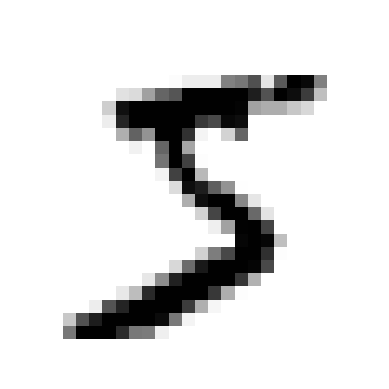

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)   # converte o vetor 1D em matriz 2D
    plt.imshow(image, cmap="binary")     # exibe em tons de cinza (0 = branco, 255 = preto)
    plt.axis("off")                      # remove os eixos da figura

some_digit = X[0]  # seleciona a primeira imagem do dataset
plot_digit(some_digit)
plt.show()

Quando visualizamos a primeira imagem (`X[0]`), ela parece um **5**.   Podemos confirmar isso verificando o rótulo correspondente em `y[0]`:


In [ ]:
y[0]

'5'

## Separando treino e teste

Antes de analisar o dataset em profundidade, é importante reservar um **conjunto de teste**.
No caso do MNIST, isso já está pronto: o dataset retornado pelo `fetch_openml()` vem organizado de forma que:

* **Primeiras 60.000 imagens** → **treinamento**.
* **Últimas 10.000 imagens** → **teste**.

Podemos separar explicitamente assim:


In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

* `X_train` e `y_train` → dados e rótulos de **treino**.
* `X_test` e `y_test` → dados e rótulos de **teste**.

---

## Por que já vem embaralhado?

O conjunto de **treino** já foi **embaralhado** previamente, o que é útil por dois motivos:

1. **Validação cruzada balanceada**

   * Como os dados foram embaralhados, cada *fold* terá exemplos variados de todos os dígitos.
   * Evita o problema de um fold ficar com poucos ou nenhum exemplo de uma classe.

2. **Robustez do algoritmo**

   * Alguns algoritmos são sensíveis à ordem dos dados.
   * Se o treino recebesse muitos exemplos iguais seguidos, o desempenho poderia cair.
   * O embaralhamento evita esse viés.



![mnist](mnist.png)

## Treinando um Classificador Binário

Para começar simples, vamos transformar o problema em uma tarefa de **classificação binária**:  
queremos que o modelo detecte apenas se uma imagem é o dígito **5** ou **não-5**.



In [ ]:
y_train_5 = (y_train == '5')  # True se for 5, False caso contrário
y_test_5  = (y_test == '5')

* `y_train_5` e `y_test_5` agora são vetores de valores booleanos (`True`/`False`).
* Essa transformação converte o problema de **10 classes (0 a 9)** em apenas **2 classes**:

  * **Classe positiva** → dígito é 5.
  * **Classe negativa** → dígito não é 5.

---
Usaremos o **Stochastic Gradient Descent (SGD)**:

* **`SGDClassifier`** → algoritmo baseado em **gradiente descendente estocástico**.

  * Treina processando **uma instância por vez**, em vez de todo o dataset de uma vez.
  * Escalável: funciona bem em **datasets grandes** como o MNIST.
  * Adequado para **aprendizado online** (pode ser atualizado continuamente com novos dados).
* O parâmetro `random_state=42` garante **reprodutibilidade** dos resultados.
* `fit(X_train, y_train_5)` treina o modelo com as imagens de treino (`X_train`) e os novos rótulos binários (`y_train_5`).

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


### O que são hiperparâmetros?

* **Parâmetros internos do modelo** que **você escolhe antes do treino** (não são aprendidos automaticamente).
* Controlam **como** o algoritmo treina e busca a solução.
* Diferente dos **parâmetros do modelo** (como pesos `w` em uma regressão), que são aprendidos a partir dos dados.

---

### Hiperparâmetros listados

* **`loss='hinge'`** → define a função de perda. Por padrão, é o hinge loss (usado em classificadores do tipo *linear SVM*).
* **`penalty='l2'`** → regularização para evitar overfitting; `l2` é a forma mais comum (penaliza grandes pesos).
* **`alpha=0.0001`** → intensidade da regularização (quanto maior, mais forte é a penalização).
* **`max_iter=1000`** → número máximo de iterações no treino.
* **`tol=0.001`** → tolerância para parar o treino (critério de convergência).
* **`shuffle=True`** → embaralha os dados a cada época, o que melhora a generalização.
* **`learning_rate='optimal'`** → estratégia para ajustar a taxa de aprendizado ao longo do treino.
* **`random_state=42`** → fixa a aleatoriedade, garantindo resultados reprodutíveis.
* **`early_stopping=False`** → indica se deve parar mais cedo caso não haja melhora em validação.

> Os demais parâmetros (`l1_ratio`, `eta0`, `power_t`, etc.) refinam detalhes do **gradiente descendente estocástico** e só costumam ser ajustados em situações mais avançadas.

### Fazendo uma previsão

In [ ]:
sgd_clf.predict([some_digit])

array([ True])


* O classificador previu que a imagem (`some_digit`) é de fato um **5** (`True`).
* Neste exemplo, ele acertou a previsão.


## Avaliando o desempenho de um classificador

Avaliar um **classificador** é mais desafiador do que avaliar um **regressor**, pois existem muitas métricas diferentes e vários pontos de atenção.  
Vamos começar com a **acurácia** e a técnica de **validação cruzada**.

Podemos usar a função `cross_val_score()` para avaliar nosso classificador com **validação cruzada k-fold**.  
No exemplo a seguir, usamos **3 folds**:

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

* Isso significa que o classificador obteve **cerca de 95% de acurácia** em cada fold.
* Acurácia = **proporção de previsões corretas**.
* Parece impressionante, mas precisamos tomar cuidado com interpretações precipitadas.

### O problema da classe desbalanceada

No dataset MNIST, apenas cerca de **10% das imagens são dígitos 5**.
Isso cria um **desbalanceamento de classes**: a maioria das instâncias é "não-5".

Para mostrar por que isso é um problema, vamos comparar com um classificador ingênuo:

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # sempre False, nunca detecta um 5

False


Esse classificador **sempre prevê "não-5"**, ou seja, ignora completamente a classe positiva.

### Avaliando o Dummy Classifier

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

* Acurácia acima de **90%**!
* Mas isso acontece **sem nunca acertar um único 5**.
* Ou seja, em datasets desbalanceados, a acurácia pode ser **enganosa**.

## Matrizes de Confusão

A **matriz de confusão** é uma ferramenta fundamental para avaliar classificadores.  
Ela mostra, para cada classe **real** (linhas), como o modelo a classificou nas classes **previstas** (colunas).

### Preparando as previsões para a matriz

Para calcular a matriz de confusão, precisamos comparar **previsões do modelo** com os **rótulos verdadeiros**.  
Porém, não devemos usar ainda o conjunto de teste (ele deve ficar reservado para a etapa final).  

Em vez disso, usamos a função `cross_val_predict`:


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Agora que temos as previsões geradas com `cross_val_predict`, podemos calcular a matriz de confusão com a função `confusion_matrix`:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

### Como interpretar a matriz

* **Cada linha** representa a **classe real**.
* **Cada coluna** representa a **classe prevista**.

**Primeira linha (classe = não-5):**

* **53.892** → corretamente previstos como não-5 (**true negatives**).
* **687** → incorretamente previstos como 5 (**false positives**, erro tipo I).

**Segunda linha (classe = 5):**

* **1.891** → incorretamente previstos como não-5 (**false negatives**, erro tipo II).
* **3.530** → corretamente previstos como 5 (**true positives**).

Um classificador perfeito teria apenas valores na **diagonal principal** (acertos):

In [ ]:
y_train_perfect_predictions = y_train_5  # simulação de perfeição
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Métricas derivadas da matriz

Embora a matriz de confusão seja rica em informações, muitas vezes queremos **métricas mais resumidas**.
Duas das mais importantes são **Precisão** e **Recall**.

### Precisão (Precision)

Indica a proporção de previsões positivas que realmente eram positivas:

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

* **TP (True Positives)** → positivos previstos corretamente.
* **FP (False Positives)** → negativos previstos incorretamente como positivos.

---

### Recall (Sensibilidade ou TPR)

O **Recall** mede a capacidade do modelo de encontrar todos os positivos:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **FN (False Negatives)** → positivos previstos incorretamente como negativos.
* Também chamado de **taxa de verdadeiros positivos (True Positive Rate)**.




![conf](m_conf.png)

## Precisão e Recall

O Scikit-Learn facilita o cálculo de métricas de classificação, como **precisão** e **recall**:

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred) 

0.6511713705958311

* **Precisão (Precision)** → quando o classificador diz que é um 5, ele acerta **83,7% das vezes**.
* **Recall (Sensibilidade)** → o classificador só consegue detectar **65,1% dos 5s reais**.

👉 Isso mostra que a alta acurácia (\~95%) que vimos antes era enganosa. Quando olhamos para **precisão** e **recall**, percebemos que o desempenho real é bem mais modesto.

---

## Combinando Precisão e Recall: F1-Score

O **F1-Score** é a **média harmônica** entre precisão e recall:

$$
F1 = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}
$$

* Diferente da média aritmética, a média harmônica **puxa o valor para baixo** se um dos dois for muito baixo.
* Assim, só teremos um F1 alto se **tanto precisão quanto recall forem bons**.

Exemplo no Scikit-Learn:

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

## Interpretação

* O F1 privilegia classificadores com **equilíbrio** entre precisão e recall.
* Mas **nem sempre isso é o que queremos**:

  * **Quando priorizar precisão:**
    Ex.: filtro de vídeos seguros para crianças → melhor rejeitar vídeos bons (baixo recall) do que deixar passar um vídeo impróprio.
  * **Quando priorizar recall:**
    Ex.: detectar furtos em câmeras de segurança → melhor receber falsos alertas (baixa precisão) do que deixar passar furtos reais.

Esse dilema é chamado de **trade-off precisão/recall**:

* Aumentar a **precisão** → geralmente reduz o **recall**.
* Aumentar o **recall** → geralmente reduz a **precisão**.

## O Trade-off Precisão/Recall

O **SGDClassifier** (e muitos outros classificadores lineares) toma suas decisões com base em uma **função de decisão**:  
- Cada instância recebe um **score**.  
- Esse score é comparado com um **limiar (threshold)**.  
  - Se o score for **maior que o limiar** → classe **positiva** (5).  
  - Caso contrário → classe **negativa** (não-5).


### Como o limiar afeta o desempenho?

Imagine várias imagens ordenadas da menor para a maior pontuação:

- **Threshold no meio** (exemplo do livro):  
  - 4 imagens de 5 corretamente identificadas (**True Positives**).  
  - 1 imagem de 6 confundida com 5 (**False Positive**).  
  - **Precisão** = 4 / (4 + 1) = 80%.  
  - Mas, de 6 dígitos "5" no total, só 4 foram detectados → **Recall** = 4 / 6 = 67%.  

- **Threshold mais alto** (mais restritivo):  
  - O "6" deixa de ser confundido → **False Positive** vira **True Negative**.  
  - A **Precisão** sobe para 100%.  
  - Mas um dos "5" deixa de ser detectado → **Recall** cai para 50%.  

- **Threshold mais baixo** (mais permissivo):  
  - O modelo captura mais "5s" reais → **Recall aumenta**.  
  - Mas também passa a classificar incorretamente mais não-5s como "5" → **Precisão diminui**.  


### Conclusão

- Ajustar o **limiar de decisão** permite controlar o equilíbrio entre **Precisão** e **Recall**.  
- Não é possível maximizar ambos ao mesmo tempo.  
- Escolher o melhor ponto depende da **aplicação prática**:  
  - **Mais precisão** → quando erros positivos são muito caros (ex.: vídeos seguros para crianças).  
  - **Mais recall** → quando perder positivos é inaceitável (ex.: diagnósticos médicos, segurança).  

![pr](pr.png)

## Ajustando o limiar manualmente com `decision_function`

O Scikit-Learn não permite **definir diretamente** o limiar usado pelo classificador.  
Por padrão, o **`SGDClassifier`** utiliza **threshold = 0**.  

No entanto, podemos acessar os **scores de decisão** usando o método `decision_function()` e, a partir deles, aplicar qualquer limiar que quisermos.

### Exemplo com uma única instância

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])